In [1]:
import numpy as np

from results_L_4_1000000_N_15 import results as results_4 


#order 4
from results_L_5_100000_N_20 import results as results_5_20
from results_L_5_100000_N_30 import results as results_5_30
#order 2
from results_L_5_1000000_N_21 import results as results_5_21
from results_L_5_100000_N_24 import results as results_5_24
#order 10
from results_L_5_1000000_N_22 import results as results_5_22
#order 11
from results_L_5_100000_N_23 import results as results_5_23


from results_L_6_500000_N_33 import results as results_6

#order 10
from results_L_7_50000_N_66 import results as results_7_66
from results_L_7_50000_N_66_compat import results as results_7_66_c
#order 11
from results_L_7_50000_N_69 import results as results_7_69
#order 4
from results_L_7_50000_N_68 import results as results_7_68

from results_L_7_50000_N_71 import results as results_7
from results_L_8_12000_N_132 import results as results_8_132
from results_L_8_12000_N_132_montecarlo import results_1 as results_1
from results_L_8_12000_N_132_montecarlo import results_2 as results_2


from results_L_8_12000_N_132_compat import results as results_8_132_c
from results_L_8_12000_N_129 import results as results_8_129
from results_L_8_12000_N_131 import results as results_8_131

from results_L_8_12000_N_256 import results as results_8_256
from results_L_8_12000_N_255 import results as results_8_255
from results_L_8_12000_N_254 import results as results_8_254
from results_L_8_12000_N_253 import results as results_8_253
from results_L_8_12000_N_252 import results as results_8_252
from results_L_8_12000_N_238 import results as results_8_238
from results_L_8_12000_N_248 import results as results_8_248
from results_L_8_12000_N_217 import results as results_8_217


from matplotlib.pyplot import *

In [3]:
results = [results_4, results_5_21, results_6, results_7_68, results_8_255]
N = [15,21,33,68,255]
maxiter = [1_000_000, 1_000_000, 500_000, 50_000, 12_000]
first_L = 4

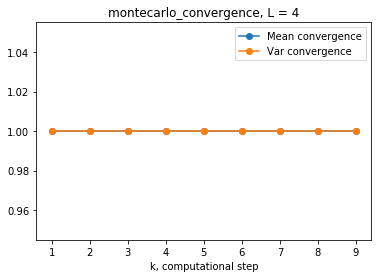

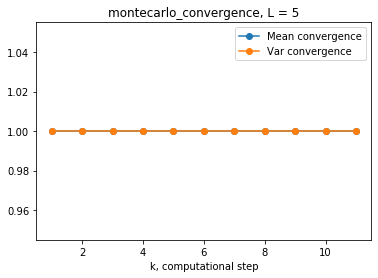

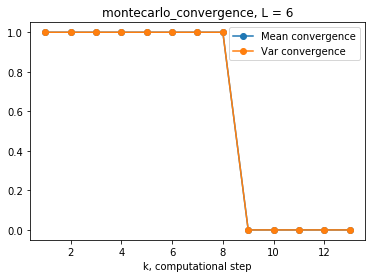

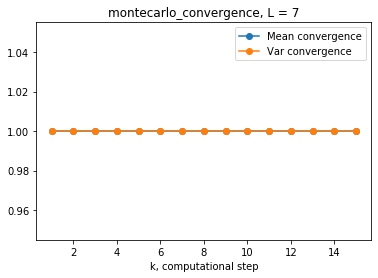

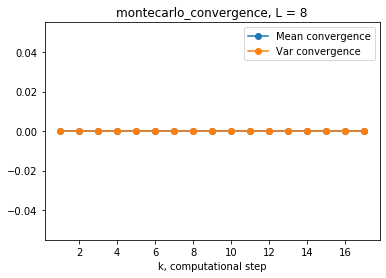

In [4]:
for i in range(5):
    interesting = results[i]
    x = range(1,2*(i+first_L)+2)
    plot(x, [interesting[k][0][0] for k in range(len(interesting))], "-o", label="Mean convergence")
    plot(x, [interesting[k][0][1] for k in range(len(interesting))], "-o", label="Var convergence")
    legend()
    xlabel('k, computational step')
    title('montecarlo_convergence, L = ' + str(i+first_L))
    show()

## Estimate convergence

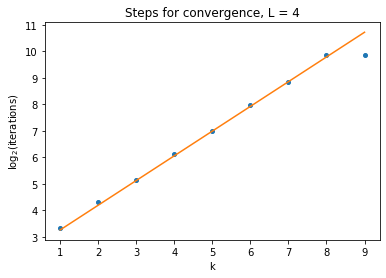

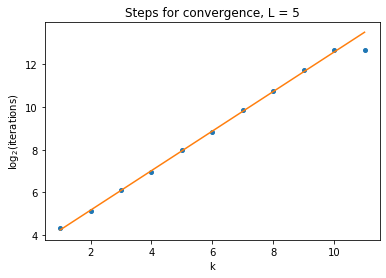

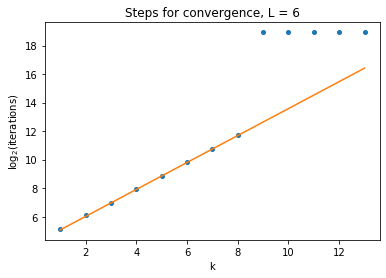

In [16]:
for L in range(4,7):
    max_k = 2 * L + 1

    first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()
    if first_non_convergence: first_non_convergence = first_non_convergence[0]
    else: first_non_convergence = -1

    log_iter = np.log2([len(results[L-first_L][k][1]) for k in range(len(results[L-first_L]))])
    plot(range(1, len(log_iter) + 1), log_iter, 'o', markersize=4)
    m = np.mean(np.diff(log_iter[:first_non_convergence]))
    q = log_iter[0] - 1
    x = np.array(range(1,max_k+1))
    plot(x, m * x + q)
    title("Steps for convergence, L = "+str(L))
    xlabel("k")
    ylabel("log$_2$(iterations)")
    #savefig("log_iterations_convergence_L_"+str(L), dpi=300)
    show()

## DISTRIBUTIONS PLOT

3600


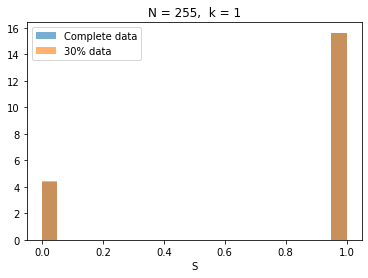

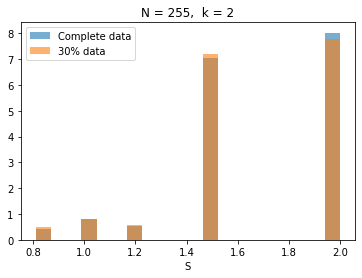

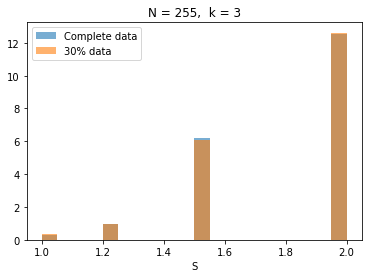

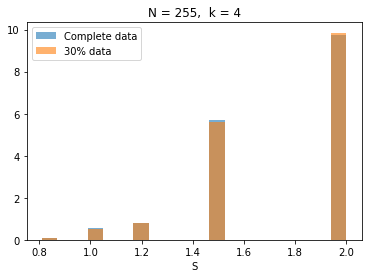

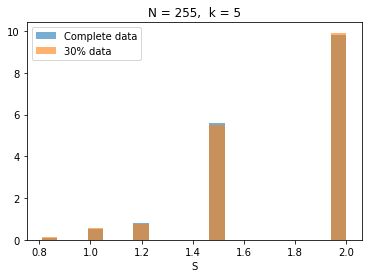

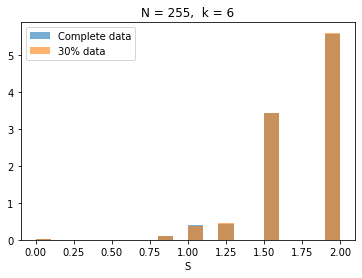

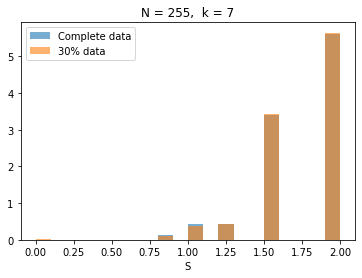

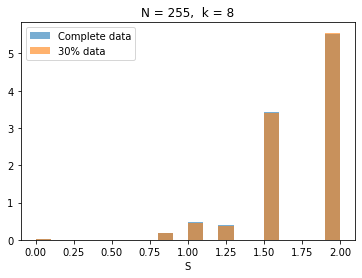

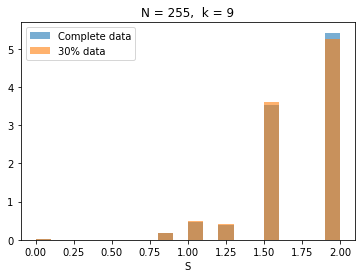

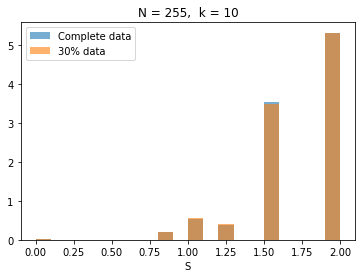

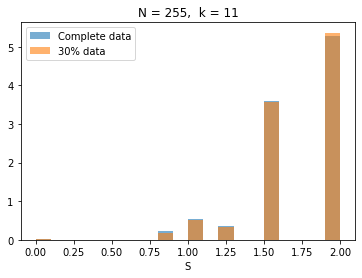

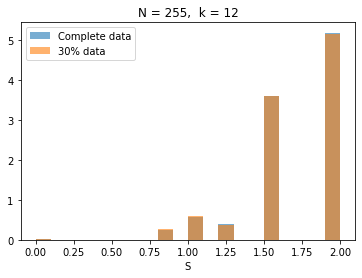

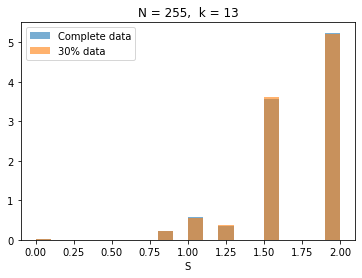

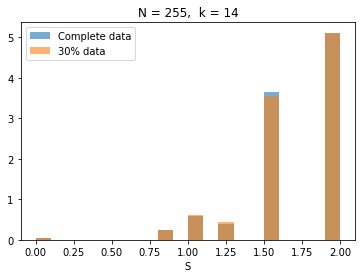

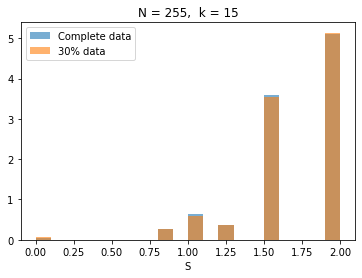

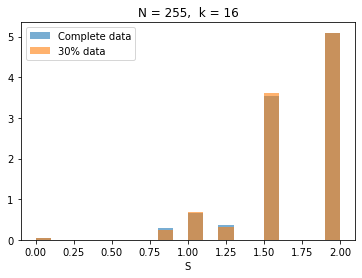

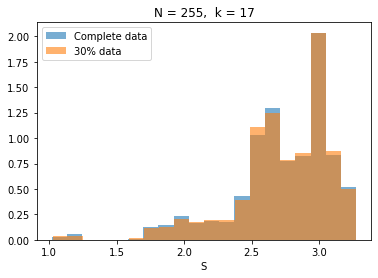

'\ncontrol = 0\nfor k in range(first_non_convergence, max_k):\n    data = results_8_132[k][1]\n    y1,binEdges = np.histogram(data,bins=20)\n    #width      = 0.05\n    #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])\n    menStd1     = np.sqrt(y1)\n    \n    #plt.bar(bincenters, y1, yerr=menStd1, width=width, edgecolor=\'black\', ecolor=\'blue\', linewidth=1.2, alpha=0.6, label=\'run1\')\n    plt.hist(results_8_132[k][1], **kwargs, range=rang, label="complete data")\n    plt.title("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1))\n    plt.xlabel("S")\n    plt.hist(results_8_132[k][1][:partial_idx], **kwargs, range=rang, label=str(perc)+"% data")\n    data = results_8_132[k][1][:partial_idx]\n    y2,binEdges = np.histogram(data,bins=20)\n    #width      = 0.05\n    #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])\n    y2 = y2 * 100 // perc\n    menStd2     = np.sqrt(y2)\n    \n    #plt.bar(bincenters, y2, yerr=menStd2, width=width, edgecolor=\'black\',ecolor=\'orange\', linewidth=1.2,

In [8]:
from matplotlib import pyplot as plt
L = 8
first_L = 4
max_k = 2 * L + 1

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()

#if not empty
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = max_k

#first_non_convergence = max_k

#number of figures with 2 computational steps, 0
number_of_complete_figures = first_non_convergence // 2
even = (number_of_complete_figures * 2) == first_non_convergence
#percentage of data considered
perc = 30
partial_idx = maxiter[L-first_L] * perc//100

print(partial_idx)
# 2 computational steps plot
#plot converged steps
for i in range(number_of_complete_figures):
    fig, axes = plt.subplots(1,2)
    for j,ax in enumerate(axes.flatten()):
        k = 2 * i +j
        ax.hist(results[L-first_L][k][1], density=True, bins=20)
        
        #ax.hist(results[L-first_L][k][1], density=True, bins=20, label="N=217",alpha=0.6)
        #ax.hist(results_8_248[k][1], density=True, bins=20, label="N=248",alpha=0.6)
        #ax.title.set_text(" k = " + str(k+1) )
        
        ax.title.set_text("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1) )
        ax.set_xlabel("S")
        #ax.legend()
    plt.tight_layout()
    #plt.savefig('N_' +str(N[L-first_L])+ "_k_" + str(k+1), dpi=300)
    
    #plt.savefig('N_217_vs_248_k_' + str(k+1), dpi=300)
    
    plt.show()

#isolated last of the converged, if odd
if not even:
    k = first_non_convergence - 1
    plt.hist(results[L-first_L][k][1], density=True, bins=20)
    
    
    #plt.hist(results[L-first_L][k][1], density=True, bins=20, label="N=217",alpha=0.6)
    #plt.hist(results_8_248[k][1], density=True, bins=20, label="N=248",alpha=0.6)
        
    #plt.title(" k = " + str(k+1) )
    
    plt.title("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1))
    plt.xlabel("S")
    plt.tight_layout()  
    #plt.legend()
    #plt.savefig('N_' +str(N[L-first_L])+ "_k_" + str(k+1), dpi=300)
    
    #plt.savefig('N_217_vs_248_k_' + str(k+1), dpi=300)
    
    plt.show()
    
    
# plot non converged
for k in range(first_non_convergence, max_k):
    #fig, (ax1,ax2) = plt.subplots(1,2)
    plt.hist(results[L-first_L][k][1], density=True, bins=20,alpha=0.6, label="Complete data")
    plt.title("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1))
    plt.xlabel("S")
    plt.hist(results[L-first_L][k][1][:partial_idx], density=True, bins=20, alpha=0.6, label=str(perc)+"% data")
    plt.legend(loc='upper left')
    if k == 7 or k ==max_k - 1:
        #plt.savefig("Data_subset_"+str(perc)+"%_N_" +str(N[L-first_L])+ "_k_" + str(k+1), dpi=300)
        pass
    plt.show()
    
    

#See if data and perc % of data are compatible

from matplotlib import pyplot as plt
L = 8
max_k = 2 * L + 1
kwargs = dict(density=True, stacked=True, bins=20, edgecolor='black', linewidth=1.2, alpha=0.6)

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()

#if not empty
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = max_k

number_of_complete_figures = first_non_convergence // 2
even = (number_of_complete_figures * 2) == first_non_convergence

rang = None
# plot non converged

'''
control = 0
for k in range(first_non_convergence, max_k):
    data = results_8_132[k][1]
    y1,binEdges = np.histogram(data,bins=20)
    #width      = 0.05
    #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd1     = np.sqrt(y1)
    
    #plt.bar(bincenters, y1, yerr=menStd1, width=width, edgecolor='black', ecolor='blue', linewidth=1.2, alpha=0.6, label='run1')
    plt.hist(results_8_132[k][1], **kwargs, range=rang, label="complete data")
    plt.title("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1))
    plt.xlabel("S")
    plt.hist(results_8_132[k][1][:partial_idx], **kwargs, range=rang, label=str(perc)+"% data")
    data = results_8_132[k][1][:partial_idx]
    y2,binEdges = np.histogram(data,bins=20)
    #width      = 0.05
    #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    y2 = y2 * 100 // perc
    menStd2     = np.sqrt(y2)
    
    #plt.bar(bincenters, y2, yerr=menStd2, width=width, edgecolor='black',ecolor='orange', linewidth=1.2, alpha=0.6, label='run1')
    #plt.savefig("Data_subset_N_132_k_" + str(k+1), dpi=300)
    plt.legend(loc='upper left')
    plt.show()
    
    res=[]
    for i in range(len(y2)):
        if y1[i]>y2[i]:
            res.append(y1[i] - 3 * menStd1[i] <=y2[i] + 3 * menStd2[i])
        else:
            res.append(y2[i] - 3 * menStd2[i] <=y1[i] + 3 * menStd1[i])
    if np.all(res):
        pass
    else:
        control +=1
        print(y1,y2)
        print(res, k)
        raise Exception("Not all data is compatible")

if control ==0 : print("All data is compatible")
'''

## Independent runs: L=8, N = 132, 12_000

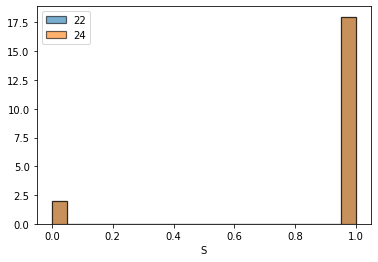

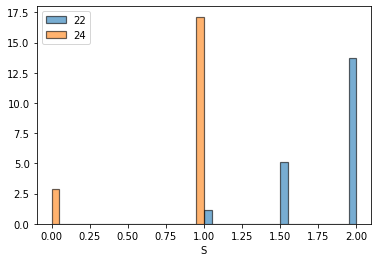

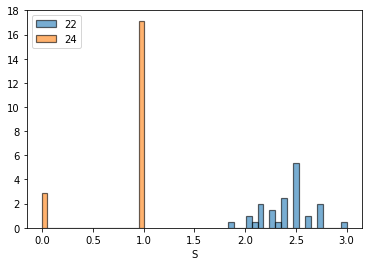

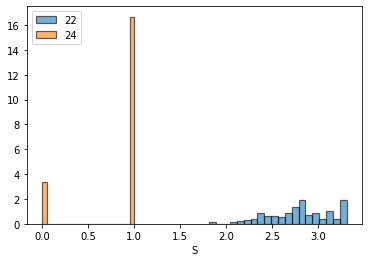

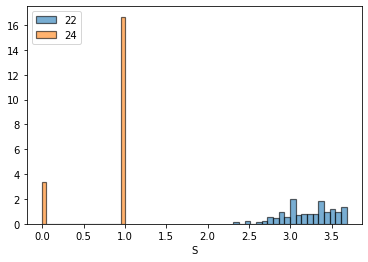

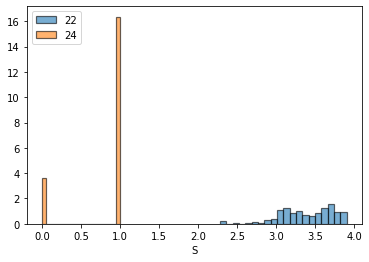

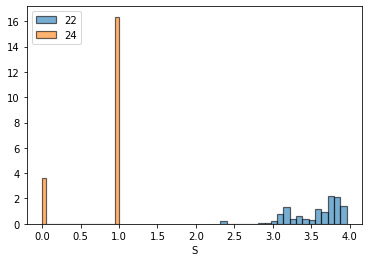

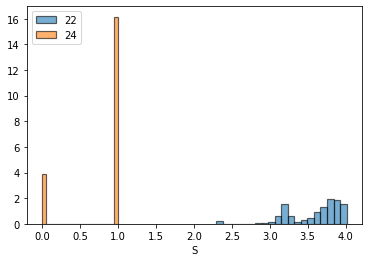

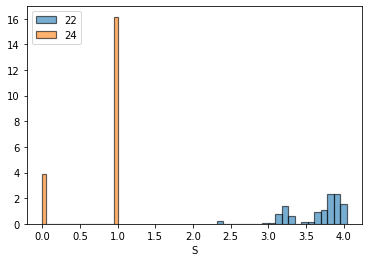

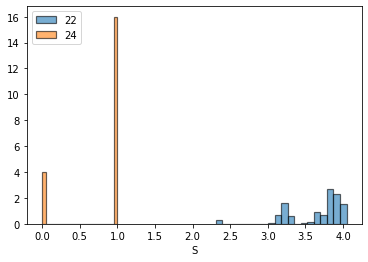

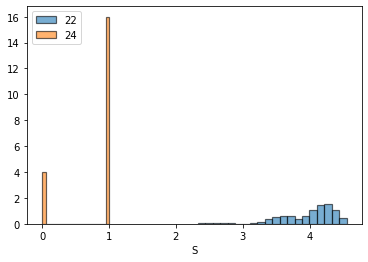

In [8]:
from matplotlib import pyplot as plt
L = 8
max_k = 2 * L + 1
kwargs = dict(density=True, stacked=True, bins=20, edgecolor='black', linewidth=1.2, alpha=0.6)

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()

#if not empty
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = max_k

number_of_complete_figures = first_non_convergence // 2
even = (number_of_complete_figures * 2) == first_non_convergence

rang = None
# plot non converged

control = 0
for k in range(first_non_convergence, max_k):
    #if k == max_k-1: rang=[3.5,8]
    
    data = results_8_132[k][1]
    y1,binEdges = np.histogram(data,bins=20)
    #width      = 0.05
    #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd1     = np.sqrt(y1)
    
    #plt.bar(bincenters, y1, yerr=menStd1, width=width, edgecolor='black', ecolor='blue', linewidth=1.2, alpha=0.6, label='run1')
    plt.hist(results_8_132[k][1], **kwargs, range=rang, label="run 1")
    plt.title("N = " + str(N[L-first_L])+ ", " + " k = " + str(k+1))
    plt.xlabel("S")
    plt.hist(results_8_132_c[k][1], **kwargs, range=rang, label="run 2")
    data = results_8_132_c[k][1]
    y2,binEdges = np.histogram(data,bins=20)
    #width      = 0.05
    #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd2     = np.sqrt(y2)
    
    #plt.bar(bincenters, y2, yerr=menStd2, width=width, edgecolor='black',ecolor='orange', linewidth=1.2, alpha=0.6, label='run1')
    #plt.savefig("Independent_runs_132_k_" + str(k+1), dpi=300)
    plt.legend(loc='upper left')
    plt.show()
    
    res=[]
    for i in range(len(y2)):
        if y1[i]>y2[i]:
            res.append(y1[i] - 3 * menStd1[i] <=y2[i] + 3 * menStd2[i])
        else:
            res.append(y2[i] - 3 * menStd2[i] <=y1[i] + 3 * menStd1[i])
    if np.all(res):
        pass
    else:
        control +=1
        print(res)
        raise Exception("Not all data is compatible")

if control ==0 : print("All data is compatible")

In [125]:
base = (8-3.5)/20
h = [0.47,0.434]
tot = [12_000,9_000]
counts = [j*base*i for i,j in zip(tot,h)]
print(np.array(counts))
bars = [np.sqrt(i)for i in counts]
print(bars)

[1269.    878.85]
[35.62302626111375, 29.645404365601088]


In [132]:
print((counts[0]-3*bars[0])/(base*12_000), (counts[1]+3*bars[1])/(base*9_000))

0.43041885970987365 0.4779191175786683


## Convergence with hypotesis test

In [14]:
from scipy.stats import ks_2samp

print("Between simulations, L=8")
max_k = 2*8+1
for k in range(0,max_k):
    long = len(results_8_132[k][1])
    p_value_lower_bound = 1.36 / np.sqrt(long)
    print("k:" + str(k+1),ks_2samp(results_8_132[k][1], results_8_132_c[k][1])[1] > p_value_lower_bound)#results_8_132_partial_9000[k][1])[1] >.05)

print("Between simulations, L=7")
max_k = 2*7+1
for k in range(0,max_k):
    long = len(results_7_66[k][1])
    p_value_lower_bound = 1.36 / np.sqrt(long)
    print("k:" + str(k+1),ks_2samp(results_7_66[k][1], results_7_66_c[k][1])[1] >p_value_lower_bound)#results_8_132_partial_9000[k][1])[1] >.05)


Between simulations, L=8
k:1 True
k:2 True
k:3 True
k:4 True
k:5 False
k:6 True
k:7 True
k:8 True
k:9 True
k:10 True
k:11 True
k:12 True
k:13 True
k:14 True
k:15 True
k:16 True
k:17 True
Between simulations, L=7
k:1 True
k:2 True
k:3 True
k:4 True
k:5 True
k:6 True
k:7 True
k:8 True
k:9 True
k:10 True
k:11 True
k:12 True
k:13 True
k:14 True
k:15 True


(array([1.73160173, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 8.26839827]),
 array([-6.40685301e-16,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
         4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

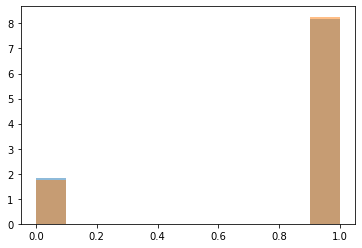

In [46]:
partial_idx = len(results[5-first_L][6][1]) // 4
plt.hist(results[5-first_L][6][1], density=True, alpha=0.5)
plt.hist(results[5-first_L][6][1][:-partial_idx], density=True, alpha=0.5)

## MERGING THE TWO INDEPENDENT RUNS

/home/simone/anaconda3/envs/python-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
No handles with labels found to put in legend.


[2628.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0. 9372.] [7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 7.]


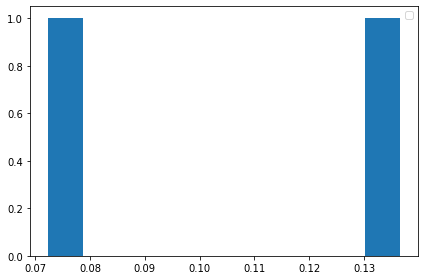

No handles with labels found to put in legend.


[ 778.    0.    0.  118.    0.    0.    0.    0.    0.    0.    0. 6730.
    0.    0.    0.    0.    0.    0.    0. 4374.] [ 33.   0.   0.  26.   0.   0.   0.   0.   0.   0.   0.  44.   0.   0.
   0.   0.   0.   0.   0. 103.]


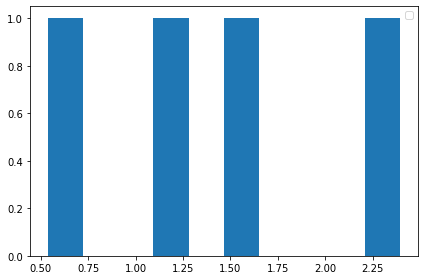

No handles with labels found to put in legend.


[  50.   51.    0.    0.    0.  616.  177.  286.  295.  157.  495.  348.
  516. 5139.    0.  283. 2069.    0.    0. 1518.] [ 0.  7.  0.  0.  0. 16.  1.  1.  7. 20.  1.  0. 25. 49.  0. 18.  8.  0.
  0. 31.]


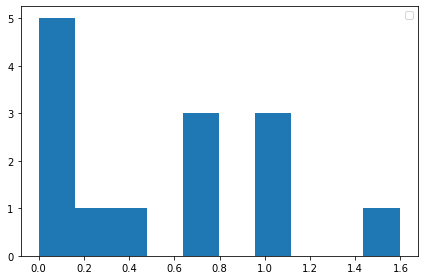

No handles with labels found to put in legend.


[  93.   26.  484.   88.    0.  156.  246.  407.  494.  871. 1135. 2128.
  603. 1092.  758. 1257.  891.  638.  416.  217.] [ 4.  1.  4. 29.  0. 11. 15. 13. 25. 18. 32. 89. 23. 73.  4.  8. 25.  2.
  3. 17.]


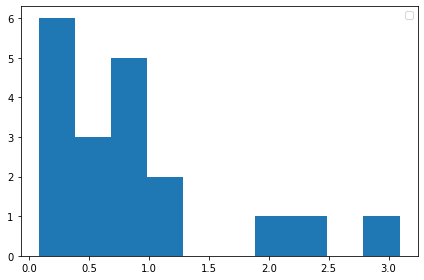

No handles with labels found to put in legend.


[  68.   50.  122.    0.  245.  250.  876.  369.  750.  808. 1205.  800.
 1196. 1401. 1427.  859.  525.  436.  326.  287.] [  5.   2.  16.   0.  16.  11.   3.  27.  74.  53. 108.   1.  61.  54.
   2.  11.  44.  63.   7.  54.]


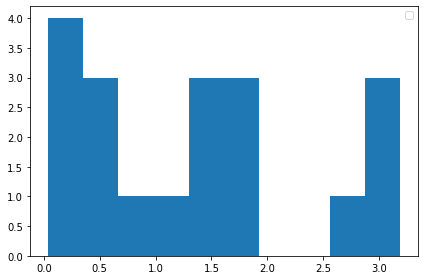

No handles with labels found to put in legend.


[  63.   64.   72.   24.  190.  397.  406.  492.  756.  762.  757.  684.
 1482. 1458. 1459.  484. 1203.  402.  628.  217.] [ 2.  4. 22.  6. 13. 29. 43. 19. 23. 17. 37. 25. 94.  8.  2. 28. 28. 30.
 29. 21.]


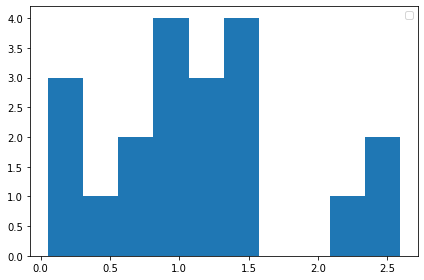

No handles with labels found to put in legend.


[  62.    4.    0.   32.   22.   76.  174.  862.  340.  388.  322.  983.
  927. 1608. 1835. 1570. 1257.  812.  535.  191.] [ 1.  2.  0.  8.  3.  3.  9. 11.  0. 16. 10. 34.  8. 65. 82. 18. 11.  5.
 25.  5.]


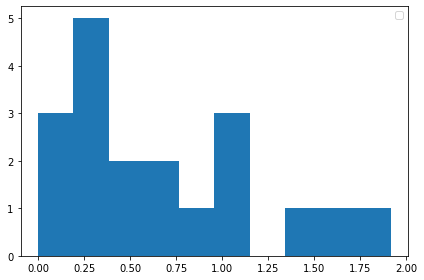

No handles with labels found to put in legend.


[9.700e+01 1.000e+00 0.000e+00 1.900e+01 3.200e+01 4.300e+01 1.350e+02
 1.118e+03 2.760e+02 2.360e+02 2.170e+02 7.090e+02 9.650e+02 1.695e+03
 2.378e+03 1.166e+03 1.505e+03 6.600e+02 4.950e+02 2.530e+02] [ 7.  2.  0.  9. 12. 10.  6. 30. 31. 14.  3.  9. 19. 53. 35. 71. 11. 11.
 17. 10.]


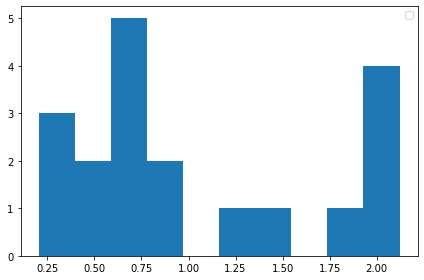

No handles with labels found to put in legend.


[7.700e+01 0.000e+00 0.000e+00 2.000e+00 6.000e+00 2.900e+01 9.100e+01
 1.234e+03 1.000e+00 3.500e+01 1.130e+02 2.400e+02 6.760e+02 1.942e+03
 2.559e+03 9.070e+02 2.071e+03 1.104e+03 5.220e+02 3.910e+02] [10.  0.  0.  0.  2.  6.  5. 39.  2.  4.  0. 51. 58. 19. 78. 28. 14. 20.
 14. 28.]


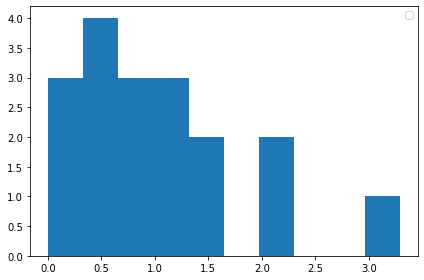

No handles with labels found to put in legend.


[1.130e+02 0.000e+00 0.000e+00 0.000e+00 3.000e+00 2.000e+01 6.900e+01
 1.344e+03 1.000e+00 2.100e+01 8.800e+01 2.090e+02 4.550e+02 1.829e+03
 2.836e+03 9.290e+02 2.060e+03 1.061e+03 5.700e+02 3.920e+02] [14.  0.  0.  0.  0.  2. 17. 60.  2.  3.  8. 39.  4. 24. 68. 61. 25. 28.
 12. 13.]


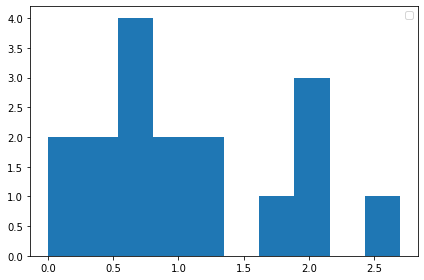

No handles with labels found to put in legend.


[1.010e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 7.400e+01
 1.420e+03 0.000e+00 1.000e+00 3.000e+00 4.400e+01 2.360e+02 1.695e+03
 2.815e+03 1.167e+03 2.236e+03 1.080e+03 6.960e+02 4.290e+02] [ 9.  0.  0.  0.  0.  1. 18. 54.  0.  1.  1.  7. 51. 31.  2.  2. 32. 36.
  6. 37.]


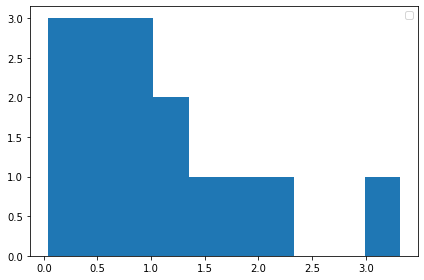

[1.220e+02 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 4.500e+01
 1.571e+03 0.000e+00 1.000e+00 2.000e+00 2.600e+01 1.500e+02 1.531e+03
 3.083e+03 1.176e+03 2.181e+03 1.001e+03 6.700e+02 4.400e+02] [21.  0.  0.  0.  1.  1.  6. 12.  0.  0.  2.  8.  1. 53. 74. 23.  9. 16.
 94. 24.]


/home/simone/anaconda3/envs/python-env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


ValueError: supplied range of [0.0, inf] is not finite

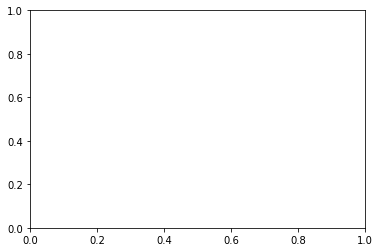

In [88]:
L = 8
max_k = 2 * L + 1

kwargs = dict(density=True, stacked=True, bins=20)
cumulative = []
rang=None
for k in range(0, max_k):
    #fig, (ax1,ax2,ax3) = plt.subplots(1,3)
    
    #if k == max_k - 1: rang=[4,8]
    counts_run1, edges, _ = plt.hist(results_8_132[k][1], bins=20)
    rang = [edges[0], edges[-1]]
    counts_run2,_,_ = plt.hist(results_8_132_c[k][1], bins=20, range=rang)
    plt.close()
    print(counts_run1, np.abs(counts_run1 - counts_run2))
    plt.hist(np.abs(counts_run1 - counts_run2) / np.sqrt(counts_run1))
    #plt.hist(counts_diff / counts_tot)
        
    #plt.hist(results_8_132_c[k][1], label='run2', alpha=.6,**kwargs,range=rang)
    #cumulative = results_8_132[k][1] + results_8_132_c[k][1]
    #plt.hist(cumulative, alpha=.3, label= 'cumulative', **kwargs, range=rang,color='magenta')
    #plt.title("L = " +str(L)+ ", k = "+str(k+1)+", cumulative")
    #ax1.hist(results[L-first_L][k][1], **kwargs)
    #ax1.title.set_text("run1, k = " + str(k+1))
    #ax1.set_xlabel("S")
    #ax2.hist(results_8_132_c[k][1], **kwargs)
    #ax2.title.set_text('run2, k = '+ str(k+1))
    #cumulative.append(results[L-first_L][k][1] + results_8_132_c[k][1])
    #ax3.hist(cumulative[-1], **kwargs)
    #ax3.title.set_text('cumulated, k = '+ str(k+1))

    plt.tight_layout()
    plt.legend()
    #plt.savefig("Cumulative_data_N_" +str(N[L-first_L])+ "_k_" + str(k+1), dpi=300)
    plt.show()

In [53]:
print("Cumulative taken from same distribution of run1")
max_k = 2*8+1
for k in range(0,max_k):
    print("k:", k+1,ks_2samp(results[4][k][1], cumulative[k])[1] >.05)
    
print("Cumulative taken from same distribution of run2")
max_k = 2*8+1
for k in range(0,max_k):
    print("k:",k+1,ks_2samp(results_8_132_c[k][1], cumulative[k])[1] >.05)

Cumulative taken from same distribution of run1
k: 1 True
k: 2 True
k: 3 True
k: 4 True
k: 5 True
k: 6 True
k: 7 True
k: 8 True
k: 9 True
k: 10 True
k: 11 True
k: 12 True
k: 13 True
k: 14 True
k: 15 True
k: 16 True
k: 17 True
Cumulative taken from same distribution of run2
k: 1 True
k: 2 True
k: 3 True
k: 4 True
k: 5 True
k: 6 True
k: 7 True
k: 8 True
k: 9 True
k: 10 True
k: 11 True
k: 12 True
k: 13 True
k: 14 True
k: 15 True
k: 16 True
k: 17 True


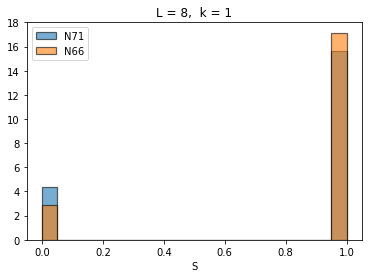

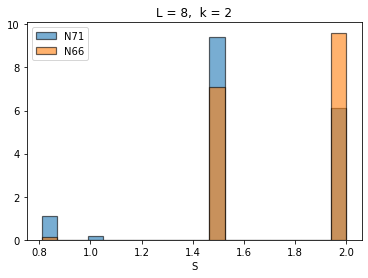

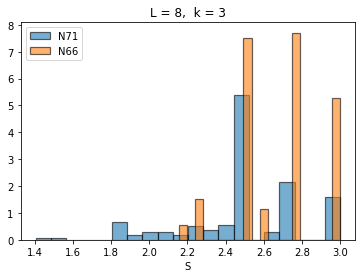

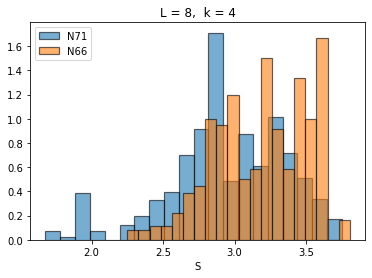

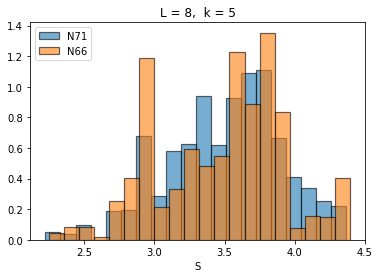

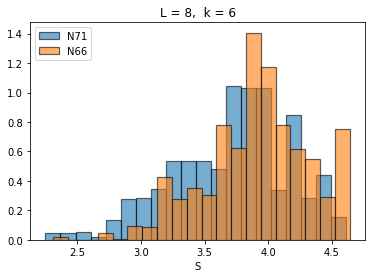

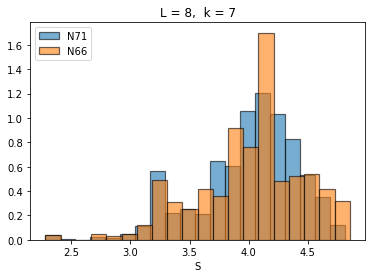

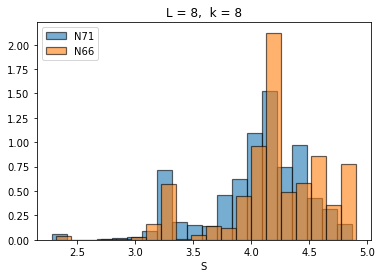

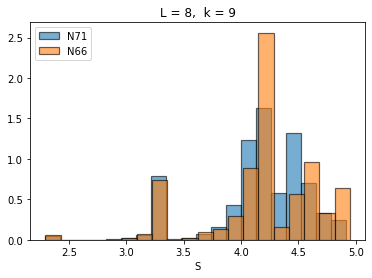

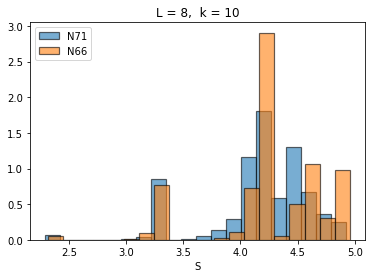

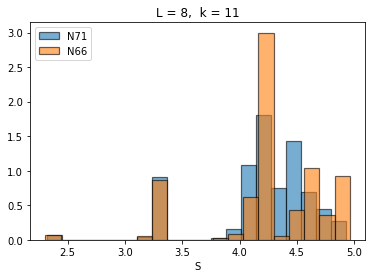

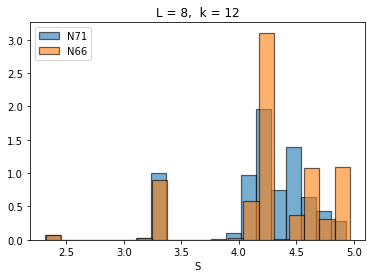

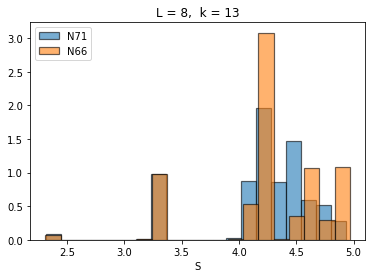

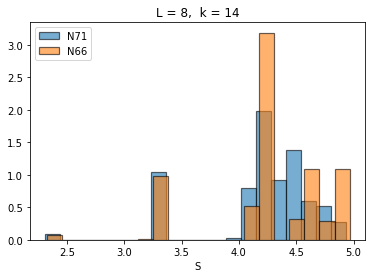

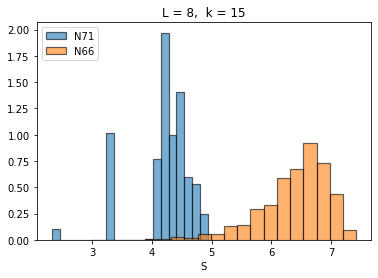

IndexError: list index out of range

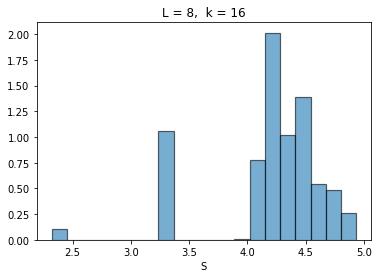

In [47]:
from matplotlib import pyplot as plt
L = 7
max_k = 2 * L + 1
kwargs = dict(density=True, stacked=True, bins=20, edgecolor='black', linewidth=1.2, alpha=0.6)

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()

#if not empty
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = max_k

number_of_complete_figures = first_non_convergence // 2
even = (number_of_complete_figures * 2) == first_non_convergence

# plot non converged
for k in range(0, max_k):    
    plt.hist(results[L-first_L][k][1], **kwargs, label="N71")
    plt.title("L = " + str(L) + ", " + " k = " + str(k+1))
    plt.xlabel("S")
    plt.hist(results_7_66[k][1], **kwargs, label="N66")
    #plt.savefig("Independent_runs_132_k_" + str(k+1), dpi=300)
    plt.legend(loc='upper left')
    plt.show()

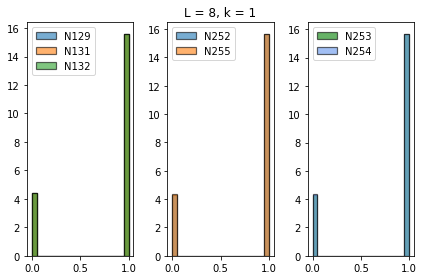

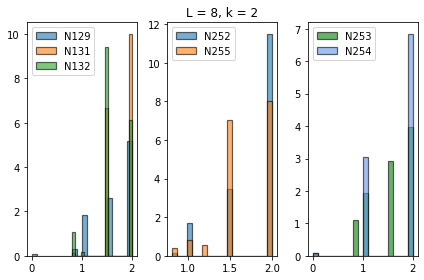

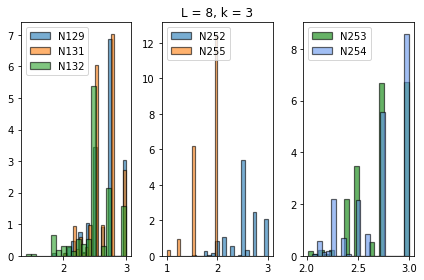

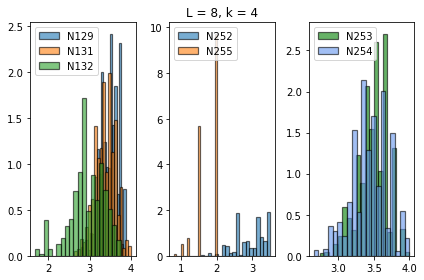

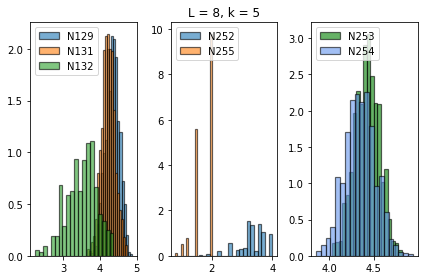

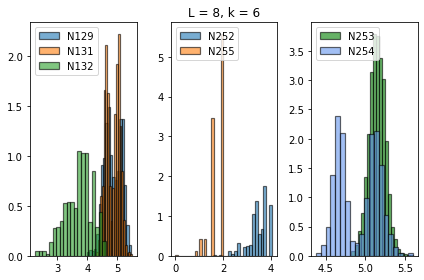

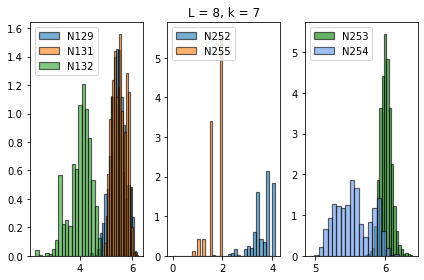

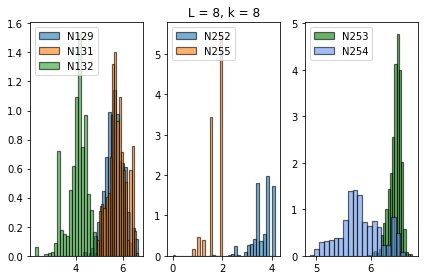

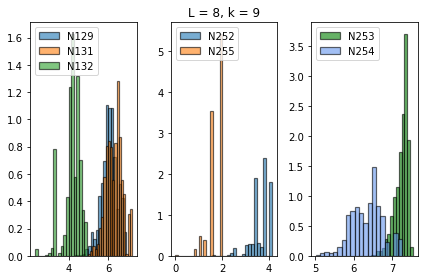

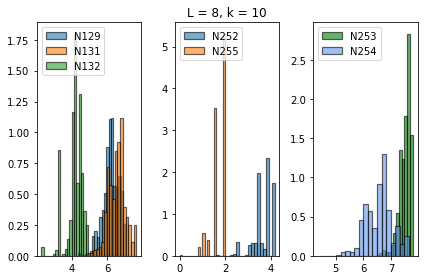

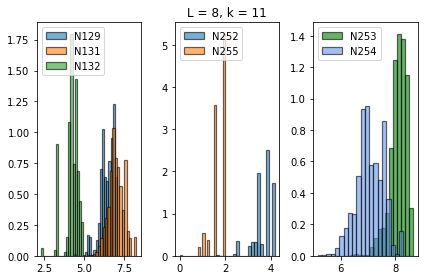

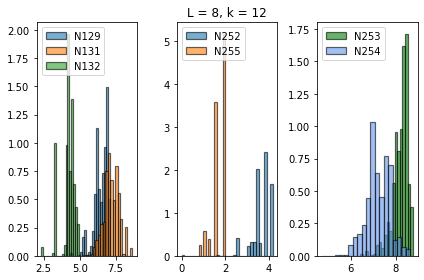

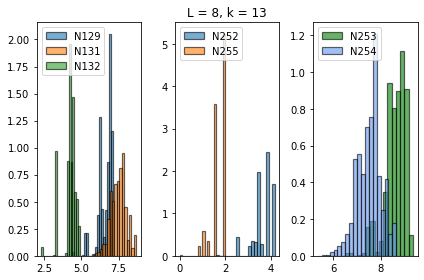

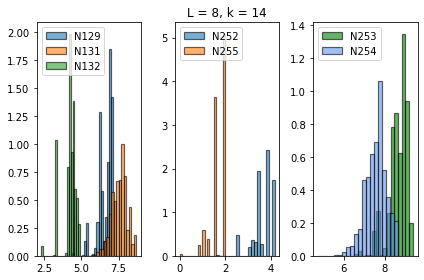

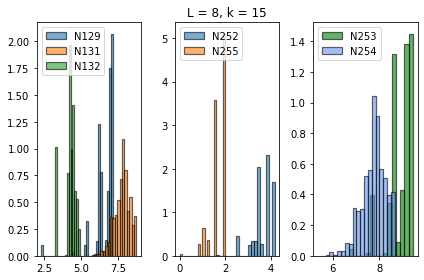

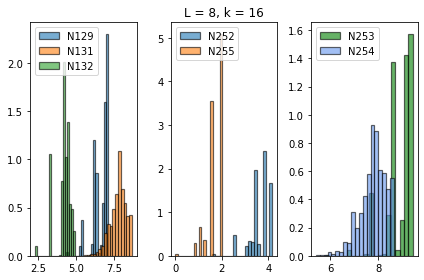

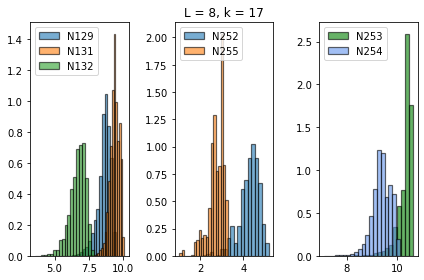

In [6]:
L = 8
max_k = 17
kwargs = dict(density=True, stacked=True, bins=20, edgecolor='black', linewidth=1.2, alpha=0.6)

results8 = [[results_8_129, results_8_131, results_8_132],
            [results_8_252,results_8_255],[results_8_253,results_8_254]]

for k in range(max_k):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3)
    labels = ['N129','N131','N132']
    for i in range(len(results8[0])):
        ax1.hist(results8[0][i][k][1],**kwargs, label=labels[i])
    ax1.legend(loc='upper left')
    
    labels = ['N252','N255']
    for i in range(len(results8[1])):
        ax2.hist(results8[1][i][k][1],**kwargs, label=labels[i])
    ax2.legend(loc='upper left')
    
    labels = ['N253','N254']
    colors = ['green', 'cornflowerblue']
    for i in range(len(results8[2])):
        ax3.hist(results8[2][i][k][1],**kwargs, label=labels[i], color=colors[i])
    ax3.legend(loc='upper left')
    ax2.set_title("L = 8, k = " + str(k+1))
    plt.savefig("L_8_k_"+ str(k+1))
    plt.tight_layout()
    plt.show()

Populating the interactive namespace from numpy and matplotlib


/home/simone/anaconda3/envs/python-env/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


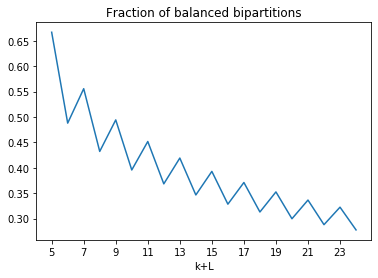

[(9, 126), (10, 252), (11, 462), (12, 924), (13, 1716), (14, 3432), (15, 6435), (16, 12870), (17, 24310), (18, 48620), (19, 92378), (20, 184756), (21, 352716), (22, 705432), (23, 1352078), (24, 2704156)]


In [19]:
%pylab inline
from scipy.special import comb as bin_coeff
def number_of_balanced_bipartitions(size: int) -> int:
    return bin_coeff(size, size / 2, exact=True)



last_L = 8
balanced = [number_of_balanced_bipartitions(k+last_L) for k in range(1,2*last_L+1)]
fraction_1 =[number_of_balanced_bipartitions(k+last_L) / np.sum([bin_coeff(k+last_L, i, exact=True) 
                                                          for i in range(1,(k+last_L)//2 + 1)])
           for k in range(1,2*last_L+1)]

end  = last_L + 1
first_L=4
fraction_0 = [number_of_balanced_bipartitions(k+first_L) / np.sum([bin_coeff(k+first_L, i, exact=True)
                                                            for i in range(1,(k+first_L)//2 +1 )])
             for k in range(1,end - first_L)]

fraction = fraction_0 + fraction_1
plot(list(range(first_L+1,3*last_L+1)), fraction)
title("Fraction of balanced bipartitions")
xlabel("k+L")
xticks(list(range(first_L+1,3*last_L+1,2)))
show()

#
print([(i+9,b) for i,b in enumerate(balanced)])

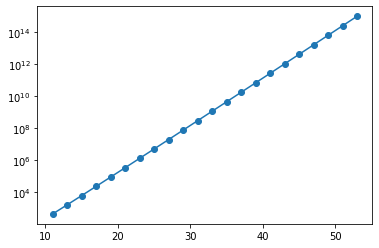

In [20]:
x = range(11,55,2)
odds= [number_of_balanced_bipartitions(l) for l in x]
plt.semilogy(x,odds,'-o')

In [22]:
def approx(n):
    c = n//2
    return np.sqrt(n/(2*pi)) * (n/c)**n / (e*(c+1))

In [23]:
percentages = [np.abs(approx(n)-number_of_balanced_bipartitions(n)) / number_of_balanced_bipartitions(n) * 100 for n in range(17,101,2)]

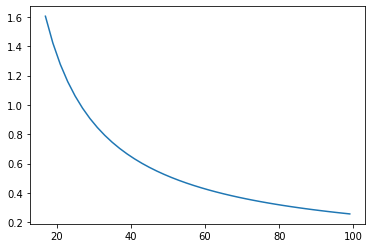

In [24]:
plot(range(17,101,2) , percentages)

In [95]:
number_of_balanced_bipartitions(16)

12870

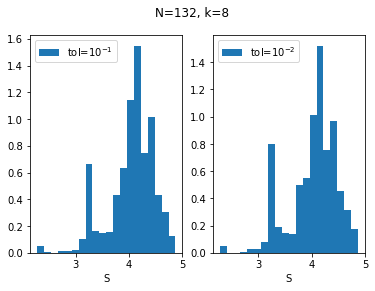

In [108]:
k=7

fig,(ax1,ax2)=plt.subplots(1,2)
fig.suptitle("N=132, k=8")

ax1.hist(results_1[k][1], density=True, bins=20,stacked=True,label="tol=$10^{-1}$")
ax2.hist(results_2[k][1], density=True, bins=20,stacked=True,label="tol=$10^{-2}$")
ax1.set_xlabel("S")
ax2.set_xlabel("S")

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
#plt.savefig("Montecarlo_N_132_k_" + str(k+1), dpi=300)
plt.show()